In [1]:
import re
import pandas as pd
import numpy as np
import sklearn as sk
import nltk
from nltk.stem import WordNetLemmatizer
import string
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [19]:
with open('../Downloads/YOUTUBE CC MIT LINALG LEC 7.txt', 'r') as file:
    data=file.readlines()
    print(data)

['\ufeff00:09\n', "OK, here's linear algebra lecture seven.\n", '00:14\n', "I've been talking about vector spaces\n", '00:19\n', 'and specially the null space of a matrix\n', '00:24\n', 'and the column space of a matrix.\n', '00:26\n', "What's in those spaces.\n", '00:28\n', 'Now I want to actually describe them.\n', '00:32\n', 'How do you describe all the vectors\n', '00:36\n', 'that are in those spaces?\n', '00:37\n', 'How do you compute these things?\n', '00:39\n', 'So this is the, turning the idea, the definition,\n', '00:46\n', 'into an algorithm.\n', '00:48\n', "What's the algorithm for solving A x =0?\n", '00:53\n', "So that's the null space that I'm interested in.\n", '00:56\n', 'So can I take a particular matrix A and describe\n', '01:01\n', "the natural algorithm, and I'll execute it for that matrix --\n", '01:06\n', 'here we go.\n', '01:08\n', 'So let me take the matrix as an example.\n', '01:12\n', "So we're definitely talking rectangular matrices in this\n", '01:16\n', 'ch

In [20]:
parsed_list=[]
for line in data:
    parsed_list.append((line.rstrip('\n')))
parsed_list[0]=parsed_list[0].lstrip('\ufeff')
print(parsed_list)


['00:09', "OK, here's linear algebra lecture seven.", '00:14', "I've been talking about vector spaces", '00:19', 'and specially the null space of a matrix', '00:24', 'and the column space of a matrix.', '00:26', "What's in those spaces.", '00:28', 'Now I want to actually describe them.', '00:32', 'How do you describe all the vectors', '00:36', 'that are in those spaces?', '00:37', 'How do you compute these things?', '00:39', 'So this is the, turning the idea, the definition,', '00:46', 'into an algorithm.', '00:48', "What's the algorithm for solving A x =0?", '00:53', "So that's the null space that I'm interested in.", '00:56', 'So can I take a particular matrix A and describe', '01:01', "the natural algorithm, and I'll execute it for that matrix --", '01:06', 'here we go.', '01:08', 'So let me take the matrix as an example.', '01:12', "So we're definitely talking rectangular matrices in this", '01:16', 'chapter.', '01:17', "So I'll make, I'll have four columns.", '01:22', 'And three r

In [21]:
timestamp_list=parsed_list[0::2]
text_list=parsed_list[1::2]
timestamp_list.pop()

''

In [22]:
df=pd.DataFrame({
    'time':timestamp_list,
    'text':text_list
})

In [23]:
df=df.iloc[0:689]

In [15]:
def get_sec(time_str):
    m, s = time_str.split(':')
    return int(m) * 60 + int(s)

In [24]:
df['time']

0      00:09
1      00:14
2      00:19
3      00:24
4      00:26
       ...  
684    42:50
685    42:51
686    42:55
687    42:59
688    43:03
Name: time, Length: 689, dtype: object

In [25]:
df['time']=df['time'].apply(lambda x: get_sec(x))

In [26]:
df.head()

,time,text
0,9,"OK, here's linear algebra lecture seven."
1,14,I've been talking about vector spaces
2,19,and specially the null space of a matrix
3,24,and the column space of a matrix.
4,26,What's in those spaces.


In [27]:
def remove_punct(text):
    new_text=''.join([(char.lower()) for char in text if char not in string.punctuation])
    return new_text
df['no_punct']=df['text'].apply(lambda x: remove_punct(x))

In [28]:
def tokenize(text):
    new_text=re.split('\W+',text)
    return new_text
df['tokenized']=df['no_punct'].apply(lambda x: tokenize(x))

In [29]:
stopwords_list=nltk.corpus.stopwords.words('english')
stemmer=WordNetLemmatizer()

def stopwords(text):
    new_text=[stemmer.lemmatize(word) for word in text if word not in stopwords_list]
    return new_text
df['analyze_text']=df['tokenized'].apply(lambda x: stopwords(x))

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer(analyzer=stopwords)
tfidf_counts=tfidf_vect.fit_transform(df['analyze_text'])

In [246]:
tfidf_kmeans=KMeans(n_clusters=50,n_jobs=1)
tfidf_X=tfidf_kmeans.fit(tfidf_counts)
df['tf_idf_cluster']=tfidf_kmeans.labels_

In [280]:
db=DBSCAN(eps=.2,min_samples=3)
tfidf_df=db.fit(tfidf_counts)
db_clusters=db.fit_predict(tfidf_counts)

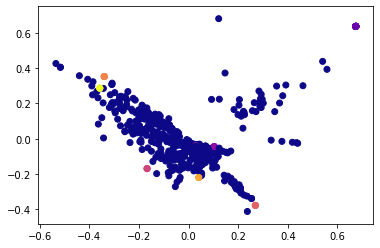

In [281]:
reduced_db_features = pca.fit_transform(tfidf_counts.toarray())
plt.scatter(reduced_db_features[:, 0], reduced_db_features[:, 1], c=db_clusters, cmap="plasma")

In [270]:
df['dbscan_cluster']=tfidf_df.labels_

In [271]:
db_grouped=df.groupby(df['dbscan_cluster']).count()
db_grouped

,time,text,no_punct,tokenized,analyze_text,tf_idf_cluster
dbscan_cluster,,,,,,
-1,639,639,639,639,639,639
0,3,3,3,3,3,3
1,15,15,15,15,15,15
2,3,3,3,3,3,3
3,9,9,9,9,9,9
4,3,3,3,3,3,3
5,3,3,3,3,3,3
6,4,4,4,4,4,4
7,4,4,4,4,4,4


In [288]:
ap=AffinityPropagation(damping=.99)
tfidf_ap=ap.fit(tfidf_counts)
ap_clusters=ap.fit_predict(tfidf_counts)

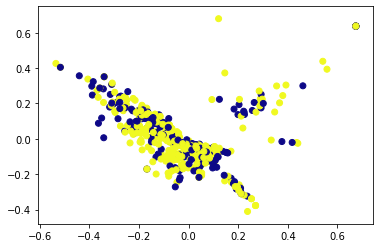

In [289]:
reduced_ap_features = pca.fit_transform(tfidf_counts.toarray())
plt.scatter(reduced_ap_features[:, 0], reduced_ap_features[:, 1], c=ap_clusters, cmap="plasma")

In [295]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift,OPTICS,AgglomerativeClustering,Birch

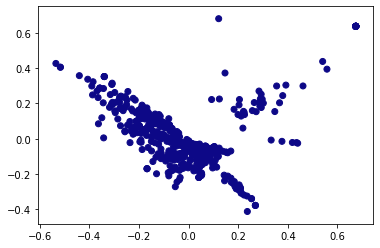

In [299]:
ms=MeanShift(bin_seeding=True,cluster_all=False)
tfidf_ms=ms.fit(tfidf_counts.toarray())
ms_clusters=ms.fit_predict(tfidf_counts.toarray())
reduced_ms_features = pca.fit_transform(tfidf_counts.toarray())
plt.scatter(reduced_ms_features[:, 0], reduced_ms_features[:, 1], c=ms_clusters, cmap="plasma")

/Users/varunpatel/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/Users/varunpatel/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


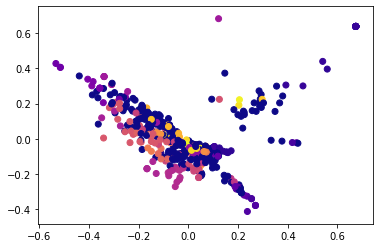

In [308]:
optics=OPTICS(min_samples=3,xi=.001)
tfidf_optics=optics.fit(tfidf_counts.toarray())
optics_clusters=optics.fit_predict(tfidf_counts.toarray())
reduced_optics_features = pca.fit_transform(tfidf_counts.toarray())
plt.scatter(reduced_optics_features[:, 0], reduced_optics_features[:, 1], c=optics_clusters, cmap="plasma")

In [290]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_counts.toarray())


In [291]:
reduced_cluster_centers = pca.transform(tfidf_kmeans.cluster_centers_)

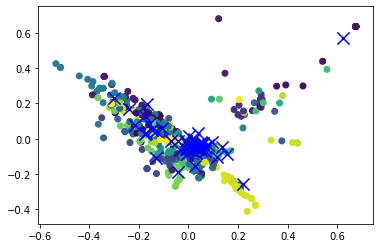

In [249]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=tfidf_kmeans.predict(tfidf_counts))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')


In [309]:
df['optics_cluster']=tfidf_optics.labels_
optics_grouped=df.groupby(df['optics_cluster']).count()
optics_grouped

,time,text,no_punct,tokenized,analyze_text,tf_idf_cluster,dbscan_cluster,ap_cluster
optics_cluster,,,,,,,,
-1,423,423,423,423,423,423,423,423
0,9,9,9,9,9,9,9,9
1,5,5,5,5,5,5,5,5
2,8,8,8,8,8,8,8,8
3,18,18,18,18,18,18,18,18
4,3,3,3,3,3,3,3,3
5,3,3,3,3,3,3,3,3
6,4,4,4,4,4,4,4,4
7,4,4,4,4,4,4,4,4


In [236]:
df[df['tf_idf_cluster']==5]

,time,text,no_punct,tokenized,analyze_text,tf_idf_cluster
45,176,"equation from another equation, I'm not changi...",equation from another equation im not changing...,"[equation, from, another, equation, im, not, c...","[equation, another, equation, im, changing, so...",5
52,200,I'm doing a legitimate operations on the equat...,im doing a legitimate operations on the equations,"[im, doing, a, legitimate, operations, on, the...","[im, legitimate, operation, equation]",5
129,467,I had three equations in four unknowns.,i had three equations in four unknowns,"[i, had, three, equations, in, four, unknowns]","[three, equation, four, unknown]",5
149,550,And then I can solve the equations for x1 and x3.,and then i can solve the equations for x1 and x3,"[and, then, i, can, solve, the, equations, for...","[solve, equation, x1, x3]",5
163,593,What are my equations?,what are my equations,"[what, are, my, equations]",[equation],5
164,594,That first equation is x1 plus just --,that first equation is x1 plus just,"[that, first, equation, is, x1, plus, just, ]","[first, equation, x1, plus, ]",5
166,605,That's the first equation.,thats the first equation,"[thats, the, first, equation]","[thats, first, equation]",5
167,607,And the second equation was 2x3 + 4x4=0.,and the second equation was 2x3 4x40,"[and, the, second, equation, was, 2x3, 4x40]","[second, equation, 2x3, 4x40]",5
168,614,Those are my two equations.,those are my two equations,"[those, are, my, two, equations]","[two, equation]",5
178,642,I look at the last equation.,i look at the last equation,"[i, look, at, the, last, equation]","[look, last, equation]",5


In [250]:
tfidf_grouped=df.groupby(df['tf_idf_cluster']).count()
tfidf_grouped

,time,text,no_punct,tokenized,analyze_text
tf_idf_cluster,,,,,
0,8,8,8,8,8
1,20,20,20,20,20
2,19,19,19,19,19
3,14,14,14,14,14
4,29,29,29,29,29
5,8,8,8,8,8
6,9,9,9,9,9
7,68,68,68,68,68
8,16,16,16,16,16


(array([25., 17.,  6.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0.        ,  10.52631579,  21.05263158,  31.57894737,
         42.10526316,  52.63157895,  63.15789474,  73.68421053,
         84.21052632,  94.73684211, 105.26315789, 115.78947368,
        126.31578947, 136.84210526, 147.36842105, 157.89473684,
        168.42105263, 178.94736842, 189.47368421, 200.        ]),
 <a list of 19 Patch objects>)

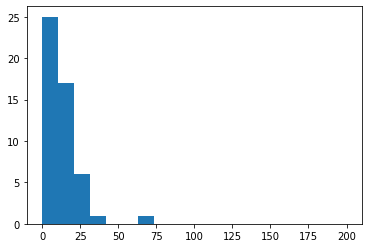

In [251]:
spread=tfidf_grouped['analyze_text'].tolist()
plt.hist(spread,bins=np.linspace(0,200,20))

In [313]:
include_list=optics_grouped[optics_grouped['analyze_text']>=5].index.tolist()
remove_list=[-1,2,3,23,25]
include_list=[val for val in include_list if val not in remove_list]
print(include_list)

[0, 1, 15, 17, 18, 19, 20, 22, 28, 30, 35, 41, 46, 47, 50]


In [314]:
for val in include_list:
    print(df[df['tf_idf_cluster']==val]['analyze_text'][0:5])
    print(val)

54                     [dont, plan, write, zero, time]
63        [take, two, time, row, away, one, get, zero]
75                      [course, move, second, column]
83                [second, column, dependent, earlier]
191    [plus, one, time, second, column, zero, column]
Name: analyze_text, dtype: object
0
154                               [free, choice]
172                 [new, thing, free, variable]
211              [ive, got, two, free, variable]
212    [made, choice, one, zero, free, variable]
223                   [free, variable, assign, ]
Name: analyze_text, dtype: object
1
12               [thats, null, space, im, interested]
40                        [im, changing, null, space]
46                        [im, changing, null, space]
47    [actually, changing, column, space, youll, see]
51                                      [im, thing, ]
Name: analyze_text, dtype: object
15
13     [take, particular, matrix, describe]
16             [let, take, matrix, example]
25           

In [124]:
def test_sizes(num_clusters,tol):
    tfidf_kmeans=KMeans(n_clusters=num_clusters,max_iter=5000,random_state=20172017)
    tfidf_X=tfidf_kmeans.fit(tfidf_counts)
    df['tf_idf_cluster']=tfidf_kmeans.labels_
    tfidf_grouped=df.groupby(df['tf_idf_cluster']).count()
    include_list=tfidf_grouped[tfidf_grouped['analyze_text']>=tol].index.tolist()
    return(len(include_list))

In [128]:
percent_reduction_list=[]
for n in range(140,200,10):
    percent_reduction_list.append(test_sizes(n)/n)
print(percent_reduction_list)

[0.40714285714285714, 0.3933333333333333, 0.35625, 0.31176470588235294, 0.3, 0.26842105263157895]


/Users/varunpatel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


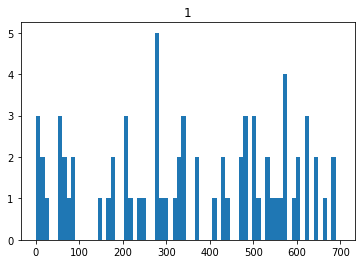

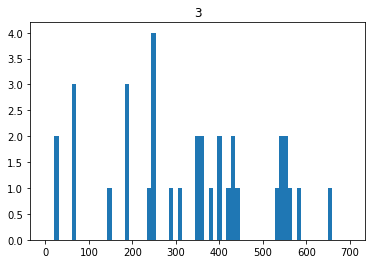

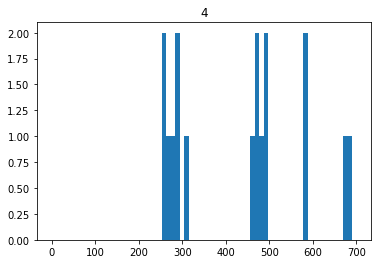

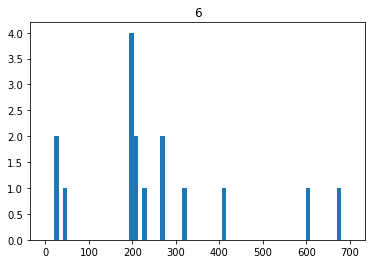

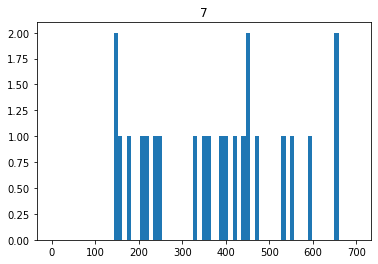

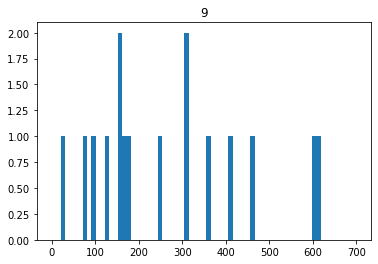

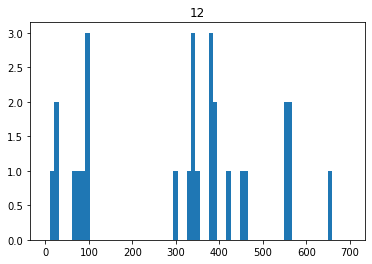

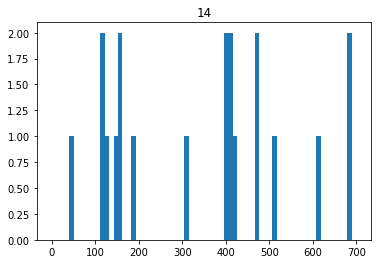

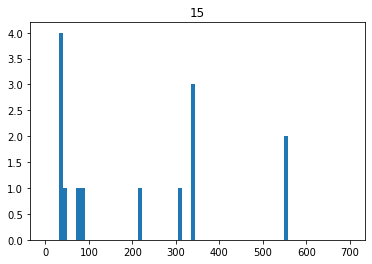

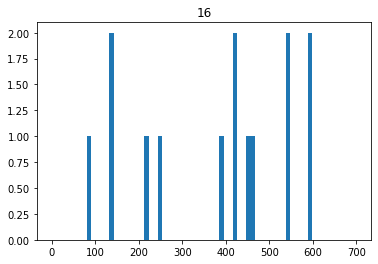

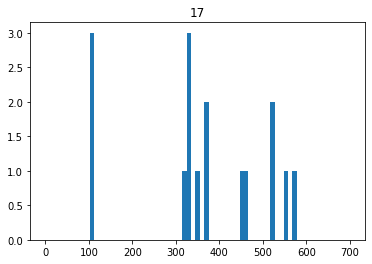

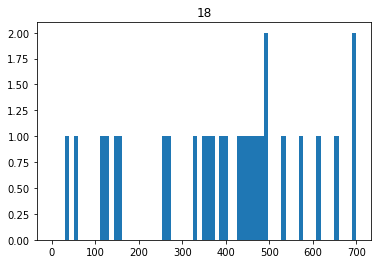

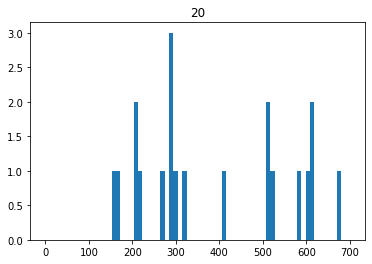

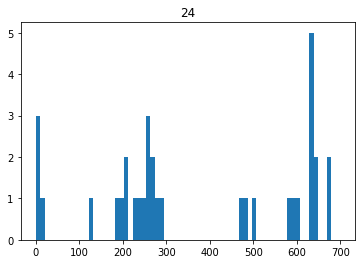

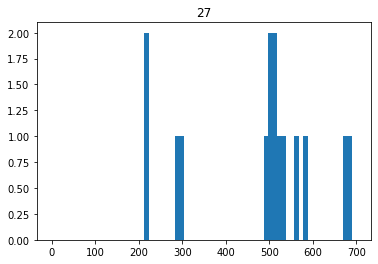

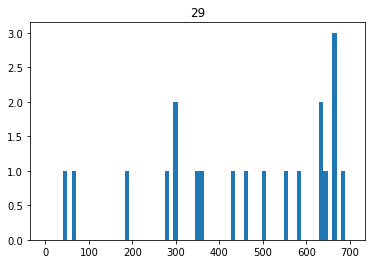

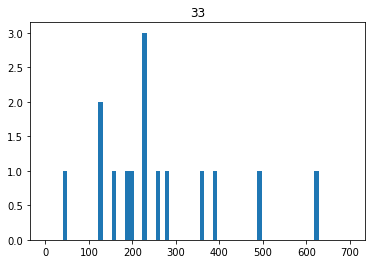

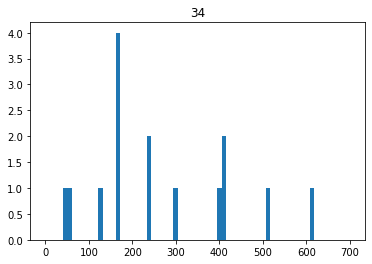

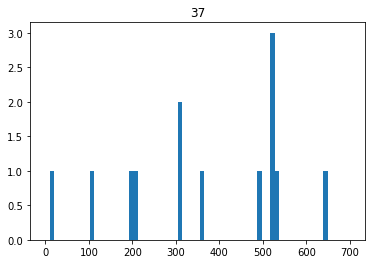

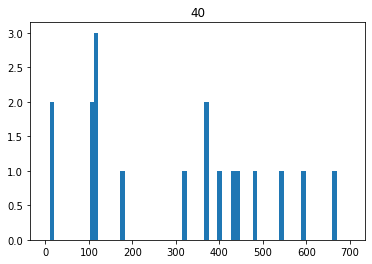

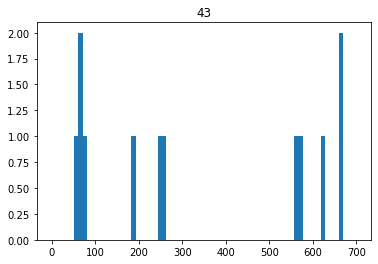

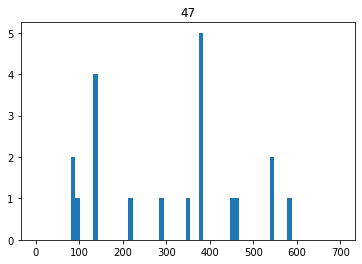

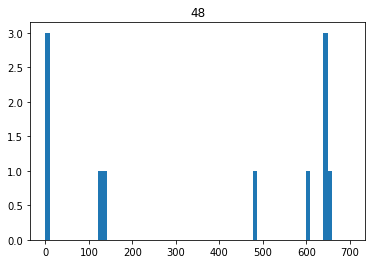

In [17]:
bin_list=np.linspace(0,700,70)
for num,val in enumerate(include_list):
    values_list=df[df['tf_idf_cluster']==val].index.tolist()
    plt.figure(num)
    plt.title(val)
    plt.hist(values_list,bins=bin_list)

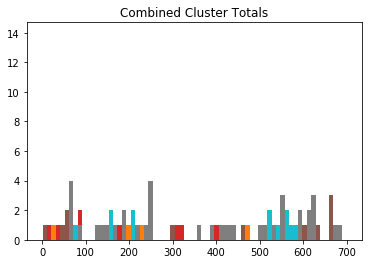

In [315]:
optimized_bin_list=np.linspace(1,700,70)
overall_list=[]
comb_list=np.zeros(69)
for num,val in enumerate(include_list):
    values_list=df[df['optics_cluster']==val].index.tolist()
    plt.title("Combined Cluster Totals")
    plt.plot(num)
    n,bins,patches=plt.hist(values_list,bins=optimized_bin_list,label=val)
    comb_list+=n
    overall_list.append(values_list)

In [316]:
print((comb_list))

[1. 1. 2. 1. 2. 3. 5. 2. 4. 0. 0. 0. 2. 1. 3. 3. 2. 1. 3. 1. 3. 1. 1. 3.
 6. 0. 0. 0. 0. 2. 1. 1. 0. 0. 0. 2. 0. 0. 1. 1. 3. 3. 2. 2. 0. 2. 1. 0.
 0. 2. 2. 3. 2. 2. 4. 4. 2. 1. 2. 1. 2. 6. 1. 0. 0. 5. 2. 2. 0.]


In [317]:

locations_list=[]
bins_size=round(bins[1]-bins[0])
for num,value in enumerate(comb_list):
    if value>=2:
        lower=min(max(int(round(bins[num]-bins_size)),0),688)
        upper=min(int(round(bins[num]+bins_size)),688)
        locations_list.append((df['time'].iloc[lower],df['time'].iloc[upper]))
        #print(df['time'].iloc[lower:upper+1])
print(locations_list)
            


[(48, 123), (127, 200), (166, 231), (200, 262), (231, 296), (262, 330), (411, 479), (479, 569), (523, 593), (569, 631), (631, 689), (693, 760), (794, 850), (823, 886), (992, 1081), (1254, 1337), (1477, 1561), (1519, 1601), (1561, 1630), (1603, 1673), (1673, 1764), (1840, 1917), (1879, 1965), (1920, 1999), (1965, 2052), (1999, 2092), (2052, 2135), (2092, 2163), (2135, 2188), (2190, 2270), (2270, 2347), (2304, 2375), (2443, 2508), (2483, 2553), (2511, 2583)]


In [318]:

newlist=[]
for value1,value2 in locations_list:
    newlist.append([value1,value2])
                              
print(newlist)
    
    


[[48, 123], [127, 200], [166, 231], [200, 262], [231, 296], [262, 330], [411, 479], [479, 569], [523, 593], [569, 631], [631, 689], [693, 760], [794, 850], [823, 886], [992, 1081], [1254, 1337], [1477, 1561], [1519, 1601], [1561, 1630], [1603, 1673], [1673, 1764], [1840, 1917], [1879, 1965], [1920, 1999], [1965, 2052], [1999, 2092], [2052, 2135], [2092, 2163], [2135, 2188], [2190, 2270], [2270, 2347], [2304, 2375], [2443, 2508], [2483, 2553], [2511, 2583]]


In [319]:
newlist.sort(key=lambda interval: interval[0])
merged = [newlist[0]]
for current in newlist:
    previous = merged[-1]
    if current[0] <= previous[1]:
        previous[1] = max(previous[1], current[1])
    else:
        merged.append(current)
        
print(merged)

[[48, 123], [127, 330], [411, 689], [693, 760], [794, 886], [992, 1081], [1254, 1337], [1477, 1764], [1840, 2188], [2190, 2375], [2443, 2583]]


In [259]:
length=0
for interval in merged:
    length+=interval[1]-interval[0]
print(length/60)
    

22.933333333333334
